In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

In [2]:
BASE_DIR   = Path(r"C:\Users\DELL\Desktop\Kariyer\Upwork\Customer_Segmentation_Analytics")          
DATA_DIR   = BASE_DIR / 'data'
OUT_DIR    = BASE_DIR / 'outputs'

In [3]:
DATA_FILE  = DATA_DIR / 'online_retail_II.csv'

In [4]:
MONTHLY_COUNTS_FILE = OUT_DIR / 'monthly_customer_counts.csv'
FORECAST_FILE       = OUT_DIR / 'year_end_forecast.csv'

In [7]:
df = pd.read_csv(
    DATA_FILE,
    parse_dates=['InvoiceDate'],   # gerekirse 'invoice_date' ya da 'Invoice Date'
    dayfirst=True,                 # Online Retail II gün/ay/yıl formatındadır
    dtype={'Customer ID': 'Int64'} # boş Customer ID'ler için tavsiye edilen tip
)

In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [ ]:
monthly_counts = (
    df.groupby(df['InvoiceDate'].dt.to_period('M'))['Customer ID']
      .nunique()
      .reset_index()
      .rename(columns={'InvoiceDate': 'Month',
                       'Customer ID': 'CustomerCount'})
)
monthly_counts['Month'] = monthly_counts['Month'].dt.to_timestamp()

In [ ]:
MONTHLY_COUNTS_FILE.parent.mkdir(exist_ok=True)
monthly_counts.to_csv(MONTHLY_COUNTS_FILE, index=False)

In [ ]:
# --- 6 monthts prediction with SARIMA --------------------------
model   = SARIMAX(monthly_counts['CustomerCount'],
                  order=(1, 1, 1),
                  seasonal_order=(1, 1, 1, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False)
results = model.fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
n_steps = 6
forecast_res = results.get_forecast(steps=n_steps)

forecast_index = pd.date_range(
    start=monthly_counts['Month'].max() + pd.DateOffset(months=1),
    periods=n_steps,
    freq='MS'
)

In [14]:
forecast_df = pd.DataFrame({
    'Month': forecast_index,
    'PredictedCustomerCount': forecast_res.predicted_mean.round().astype(int)
})

forecast_df.to_csv(FORECAST_FILE, index=False)

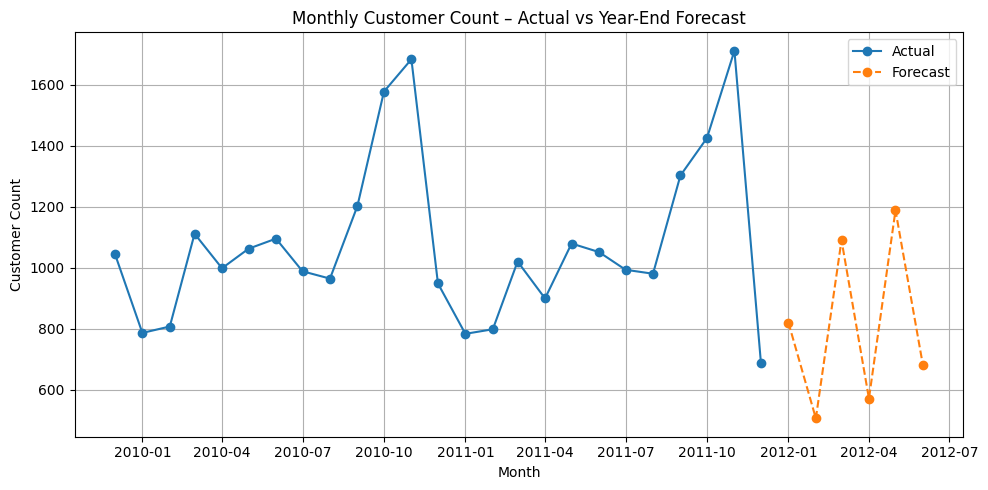

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts['Month'], monthly_counts['CustomerCount'],
         marker='o', label='Actual')
plt.plot(forecast_df['Month'], forecast_df['PredictedCustomerCount'],
         marker='o', linestyle='--', label='Forecast')
plt.title('Monthly Customer Count – Actual vs Year-End Forecast')
plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [5]:
file_path = r"C:\Users\DELL\Desktop\Kariyer\Upwork\Customer_Segmentation_Analytics\data\transactions.csv"

In [6]:

df = pd.read_csv(file_path, parse_dates=['InvoiceDate'])  
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DELL\\Desktop\\Kariyer\\Upwork\\Customer_Segmentation_Analytics\\data\\transactions.csv'

In [2]:
df = pd.read_csv('../data/transactions.csv', parse_dates=['InvoiceDate'])

FileNotFoundError: [Errno 2] No such file or directory: '../data/transactions.csv'